In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
path = "/home/blackcerberus/Documents/Documents/DS_python/cnn_numpy/dataset/plant_diseases/data_files"

def load_samples(csv_file):
    data_frame = pd.read_csv(os.path.join(path,csv_file))
    data_frame = data_frame[['Filename', 'Class', 'Label']]
    file_names = list(data_frame.iloc[:,0])
    # Get the labels present in the second column
    labels = list(data_frame.iloc[:,2])
    samples=[]
    for samp,lab in zip(file_names,labels):
        samples.append([samp,lab])
    return samples

data_set = "plant_diseases_train.csv"
samples = load_samples(data_set)

print(samples[0:5])

[['dataset/plant_diseases/train/Soybean___healthy/Soybean|healthy|513.JPG', 24], ['dataset/plant_diseases/train/Soybean___healthy/Soybean|healthy|642.JPG', 24], ['dataset/plant_diseases/train/Soybean___healthy/Soybean|healthy|955.JPG', 24], ['dataset/plant_diseases/train/Soybean___healthy/Soybean|healthy|652.JPG', 24], ['dataset/plant_diseases/train/Soybean___healthy/Soybean|healthy|631.JPG', 24]]


In [2]:
root_dir = "/home/blackcerberus/Documents/Documents/DS_python/cnn_numpy/"

In [3]:
def generator(samples, batch_size=128,shuffle_data=True,resize=224):
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    """
    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates
        samples = shuffle(samples)

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            batch_samples = samples[offset:offset+batch_size]

            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []

            # For each example
            for batch_sample in batch_samples:
                # Load image (X) and label (y)
                img_name = batch_sample[0]
                label = batch_sample[1]
                img =  cv2.imread(os.path.join(root_dir,img_name))

                # apply any kind of preprocessing

                # Add example to arrays
                X_train.append(img)
                y_train.append(label)

            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            y_train = np.array(y_train)

            # The generator-y part: yield the next training batch
            yield X_train, y_train



In [4]:
# this will create a generator object
train_datagen = generator(samples,batch_size=128)

x,y = next(train_datagen)
print ('x_shape: ', x)
print ('labels: ', y)
print(len(samples))

x_shape:  [[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[ 39  98 124]
   [ 44 100 125]
   [ 52 104 127]
   ...
   [ 55  99  68]
   [ 57  99  68]
   [ 63 105  74]]

  [[  0  40  60]
   [ 12  71  91]
   [ 31  84 104]
   ...
   [ 59 103  74]
   [ 62 103  76]
   [ 72 111  85]]

  [[ 35  99 117]
   [ 51 111 127]
   [ 44  99 114]
   ...
   [ 62 105  78]
   [ 69 109  84]
   [ 81 120  95]]]


 [[[128 129 133]
   [128 129 133]
   [130 131 135]
   ...
   [172 170 170]
   [185 183 183]
   [178 176 176]]

  [[137 138 142]
   [135 136 140]
   [133 134 138]
   ...
   [171 169 169]
   [176 174 174]
   [173 171 171]]

  [[145 146 150]
   [141 142 146]
   [136 137 141]
   ...
   [173 171 171]
   [168 166 166]
 

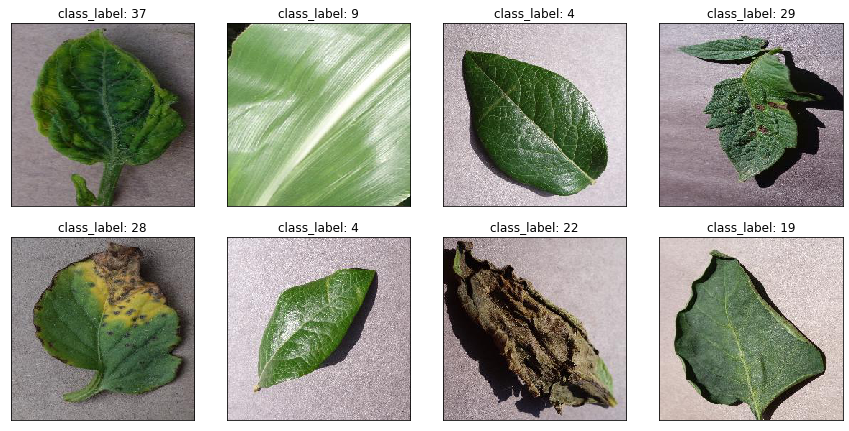

In [18]:
#### we can plot the data and see by ourselves
fig = plt.figure(1,figsize=(12,12))
for i in range(8):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    #x[i] = x[i][:,:,::-1] # converting BGR to RGB
    plt.imshow(x[i][:,:,::-1], interpolation='none')
    plt.title("class_label: {}".format(y[i]))
    plt.xticks([])
    plt.yticks([])


In [43]:
import math
def fit(samples, batch_size, epochs=50):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter + 1}")
        batch_generator = generator(samples,batch_size=128)
        iter = 1
        for batch_counter in range(math.ceil(len(samples) / batch_size)):
            images_batch, labels_batch = next(batch_generator)
            print(f"Label batch {iter}: {labels_batch}")
            iter += 1

fit(samples, batch_size=32, epochs=10)

Epoch 1
Label batch 1: [25 13  1 16 21 25 11 30 13 27  2 23 25 14 14  6 11 24 31  9  6 13 28 23
  5 12  4 35 36  9  1 20  6  4  1 23 37 20 28 15 12 31  8 32 24 24 13 28
 26  4 19 34  7 24 28 23 15 36 28 16  5 21  5  3  7  8 16 35 33 28  9 23
 32 33 10 33 25 22  6 19  1 28 13 35 27 20 10 36 18 13  0 10 22 21 24 34
  1 13 26 20 31 29 22 19 34  3 11  9 18  0  1 30 19 21 15  8  5  6 12 37
  8 18 29 11 23 19 26 26]
Label batch 2: [19 12 20 31 27 35 19 35 31 31 12 24  9  3  5  7  2 21  9  2  3 18 10 22
 31 16 20 33  1  5  2 28  5 19 29 29  1 37 24 12 18 35  7  3 27 19 22 19
 12 28  6 35  3 25  5  6 10  0  7  9 20  6 10 12  4 32  6 31 28 27  3 32
  7 12 28 32 37  9  0 14 23 16 18 31 29 25 10 15 13 22 23 21 13 23 18 26
 12 28  2 24  3 13 21 34 17 10  3 25 22  1 28  2 17 27 19  8  9 37 19 23
 15 16  8 12  9 34 11 35]
Label batch 3: [17 22  4 31 29 20 19 32 28  8 36 28 11  8 31 28 17  6 22 36 33 32 19 23
 31 33 19 28 33  0  0 12  1 12 21 22  6  8 18 10  5  1  0 14 27  2 37  4
 18  3 34  0 35 21 

KeyboardInterrupt: 